In [1]:
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt

In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Display the first few duplicate rows
print(f"There are {num_duplicates} duplicate rows in the dataset.")
print("First few duplicate rows:")
print(duplicate_rows.head())


There are 20 duplicate rows in the dataset.
First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Con

In [6]:
# Identify duplicate rows based on selected columns
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']
duplicate_rows_subset = df[df.duplicated(subset=subset_columns)]

# Count the number of duplicate rows based on the subset
num_duplicates_subset = duplicate_rows_subset.shape[0]

# Display the first few duplicate rows based on the subset
print(f"There are {num_duplicates_subset} duplicate rows based on the columns {subset_columns}.")
print("First few duplicate rows based on selected columns:")
print(duplicate_rows_subset.head())

# Analyze which columns frequently contain identical values within these duplicate rows
# For example, let's check if there are many identical values in the 'Age' and 'EdLevel' columns within these duplicates.
duplicate_analysis = duplicate_rows_subset[['Age', 'EdLevel', 'CodingActivities']].value_counts()

print("\nDuplicate rows analysis (value counts of Age, EdLevel, and CodingActivities):")
print(duplicate_analysis)


There are 64896 duplicate rows based on the columns ['MainBranch', 'Employment', 'RemoteWork'].
First few duplicate rows based on selected columns:
    ResponseId                      MainBranch                 Age  \
1            2  I am a developer by profession     35-44 years old   
2            3  I am a developer by profession     45-54 years old   
14          15  I am a developer by profession     25-34 years old   
15          16  I am a developer by profession     45-54 years old   
16          17     I code primarily as a hobby  Under 18 years old   

             Employment                            RemoteWork   Check  \
1   Employed, full-time                                Remote  Apples   
2   Employed, full-time                                Remote  Apples   
14  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
15  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
16   Student, full-time                                   NaN  App

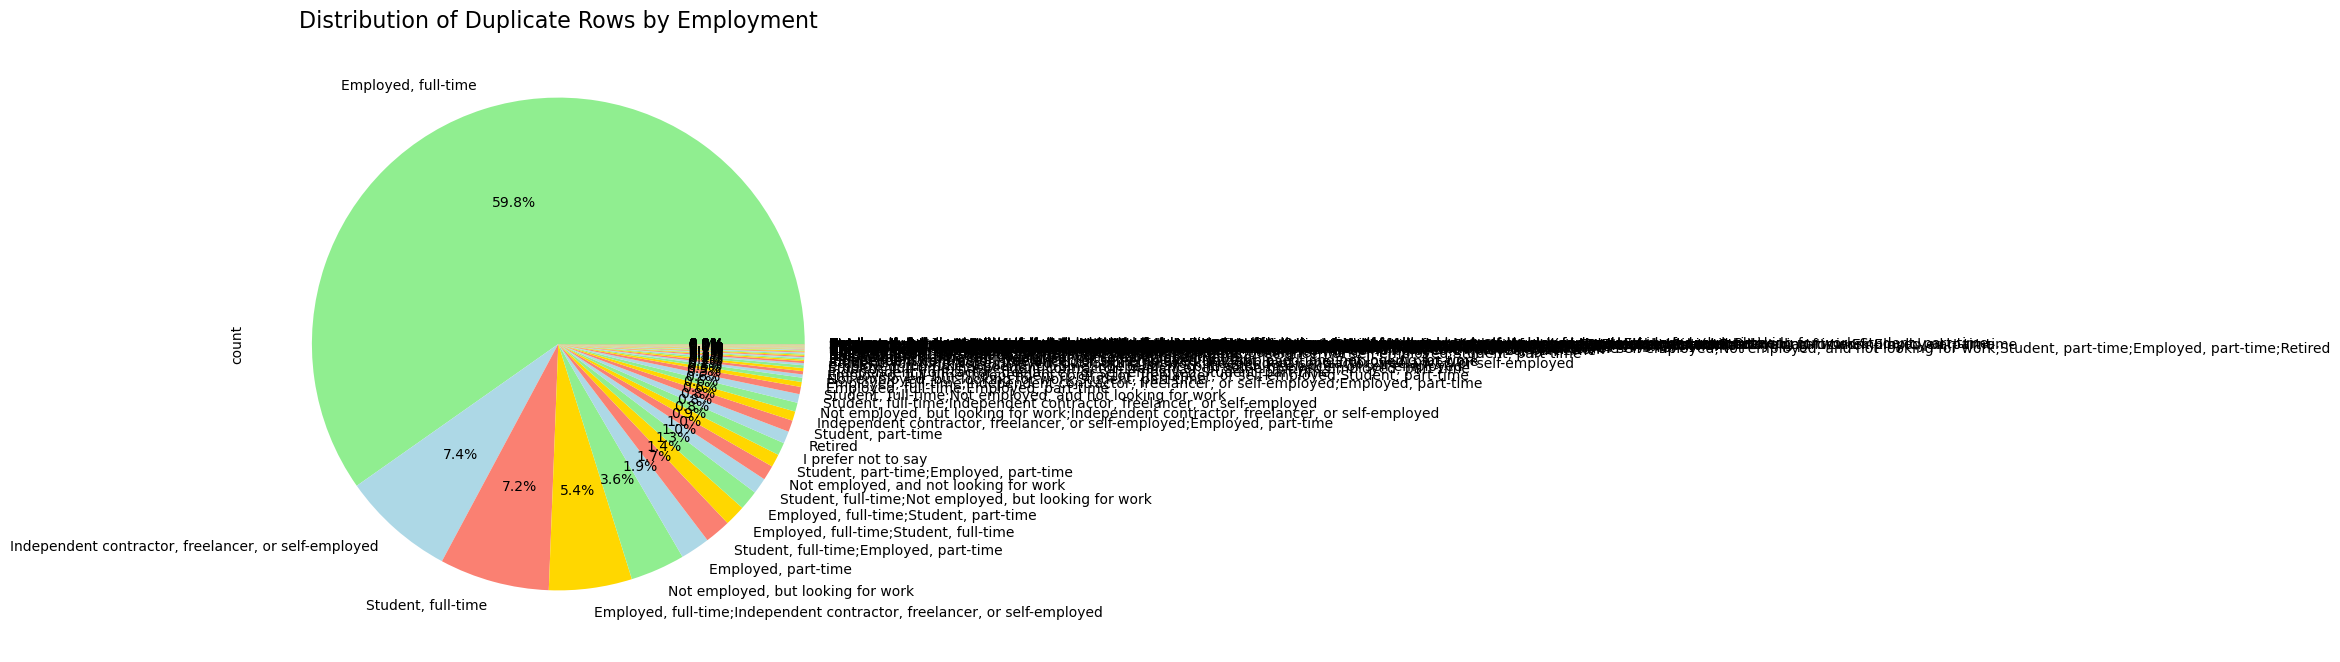

In [10]:
# Identify duplicate rows based on the 'Employment' column
duplicate_rows_employment = df[df.duplicated(subset=['Employment'])]

# Count the number of duplicates by Employment
employment_duplicates = duplicate_rows_employment['Employment'].value_counts()

# Plot a pie chart for duplicates distribution by Employment
plt.figure(figsize=(8, 8))  # Adjust figure size for pie chart
employment_duplicates.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'salmon', 'gold'], legend=False)

# Add title to the plot
plt.title("Distribution of Duplicate Rows by Employment", fontsize=16)

# Show the plot
plt.show()


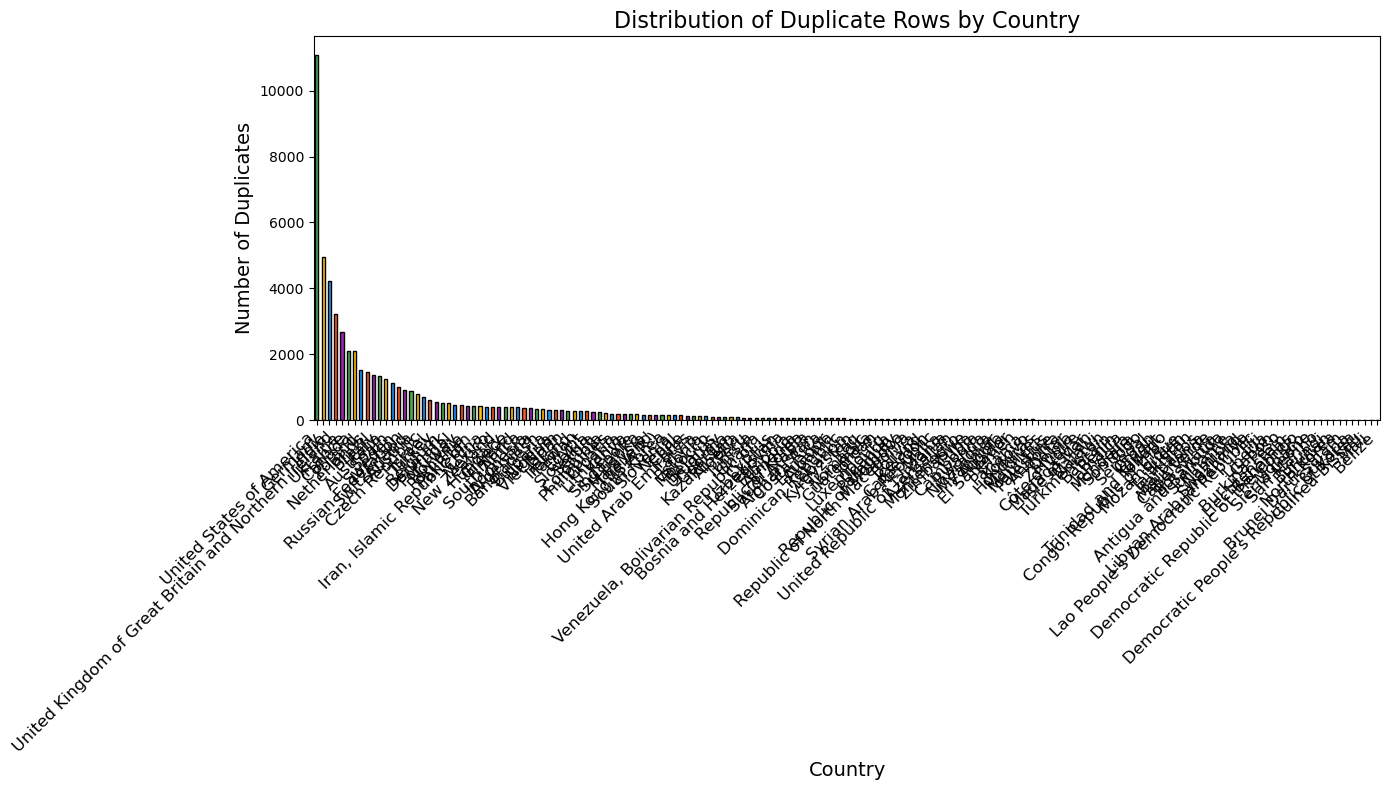

In [13]:
import matplotlib.pyplot as plt

# Plot a bar chart for duplicates distribution by Country
plt.figure(figsize=(14, 8))  # Increase figure size
country_duplicates.plot(kind='bar', color=['#4CAF50', '#FFC107', '#2196F3', '#FF5722', '#9C27B0'], edgecolor='black')

# Add labels and title to the plot
plt.title("Distribution of Duplicate Rows by Country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Number of Duplicates", fontsize=14)

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Ensure the layout is tight to avoid cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
# Identify critical columns for uniqueness (customize this list based on your analysis)
critical_columns = ['ResponseId', 'Country', 'Employment', 'Age']

# Remove duplicates based on these critical columns, keeping the first occurrence
df_unique = df.drop_duplicates(subset=critical_columns, keep='first')

# Display the number of rows before and after removal of duplicates
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing duplicates: {len(df_unique)}")

# Optionally, display the first few rows of the cleaned data
print(df_unique.head())


Original number of rows: 65457
Number of rows after removing duplicates: 65437
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3          